In [1]:
import scipy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import yen
import pandas as pd
import ast

#### *Load Network Topology*

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat(r'E:\University\Master\Project\Codes\6D-MAN\MAN157Nodes.mat')

# Display the keys in the loaded dictionary
print(mat_data.keys())

net_topology = mat_data['MAN157Nodes']
net_topology_ex = net_topology.copy()

print('the type of net_topology:', type(net_topology_ex))

topo_size = net_topology_ex.shape
print('the shape of net_topology: ', topo_size)

dict_keys(['__header__', '__version__', '__globals__', 'MAN157Nodes'])
the type of net_topology: <class 'numpy.ndarray'>
the shape of net_topology:  (157, 157)


In [3]:
# Make the adjacenccy matrix upper triangular
net_topology_ex = np.triu(net_topology_ex)

In [4]:
# Create graph from adjacency matrix
net_graph = nx.from_numpy_array(net_topology_ex)

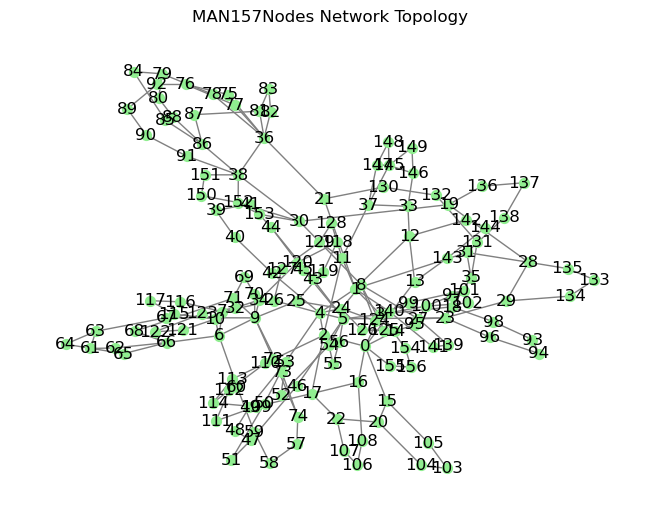

In [5]:
# Draw the graph
nx.draw(net_graph, pos = nx.spring_layout(net_graph), with_labels = True, node_color = 'lightgreen', edge_color='gray', node_size = 50)
plt.title('MAN157Nodes Network Topology')
plt.show()

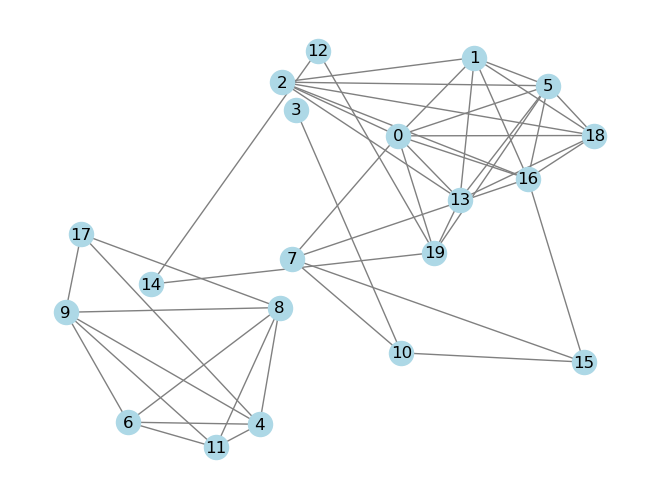

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(20, 0.3)  # Example graph

# pos = nx.spring_layout(G, k=100, iterations=100)  # Adjust k for spacing
pos = nx.spring_layout(G, k=1.5)  # Increase k for more spacing

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

plt.show()


#### *Extract all source-destination-weight pairs*

In [7]:
src_des_weight = list(net_graph.edges(data = 'weight'))
src_des_weight_matrix = np.array(src_des_weight)

print('the shape of source-destination-weight matrix:', src_des_weight_matrix.shape)

the shape of source-destination-weight matrix: (220, 3)


##### *Some statistical analysis of links*

In [8]:
num_links = src_des_weight_matrix.shape[0]

print('number of links:', num_links)
print('maximum link weight:', src_des_weight_matrix[:, 2].max())
print('maximum link weight:', src_des_weight_matrix[:, 2].min())
print('average link weight:', src_des_weight_matrix[:, 2].mean())

number of links: 220
maximum link weight: 65.67
maximum link weight: 0.7
average link weight: 11.137363636363638


##### *Calculate the number of optical amplifier spans required for signal transmission*

In [9]:
# Define span length of 70 km
span_length = 70

# Calculate the number of spans required for each link
num_spans_per_link = np.ceil(src_des_weight_matrix[:, 2] / span_length)

#### *Node categorization into hierarchical levels*

In [10]:
# manually assign nodes 2 and 6 into HL1 level
HL1_StandAlone = np.array([1, 5])

# manually assign nodes [0 2 3 4] into HL1 level
HL2_StandAlone = np.array([0, 2, 3, 4])

# manually assign nodes 6 to 38 into HL1 level
HL3_StandAlone = np.arange(6, 39)

# manually assign nodes 39:topo_size(1) into HL1 level
HL4_StandAlone = np.arange(39, topo_size[1])

# concatenated HL1, HL2, HL3 nodes
HL123_standalone = np.concatenate((HL1_StandAlone, HL2_StandAlone, HL3_StandAlone))

# there is a colocated HL4 router in each upper level routers (HL1, HL2, HL3)
HL4_colocated = np.sort(HL123_standalone)

# concatenate all HL4 nodes consist of standalone and colocated
HL4_all = np.concatenate((HL4_colocated, HL4_StandAlone))

# there is colocated HL3 routers in HL1 and HL2 nodes
HL3_colocated = np.concatenate((HL1_StandAlone, HL2_StandAlone))

# there is colocated HL2 routers in HL1 nodes
HL2_colocated = HL1_StandAlone

##### *Calculate node degree of each hierarchical level nodes*


In [11]:
# calculate HLx subnet graphs
HL4_subgraph = net_graph.subgraph(HL4_StandAlone).copy() # HL4 subnet graph
HL3_subgraph = net_graph.subgraph(HL3_StandAlone).copy() # HL3 subnet graph
HL2_subgraph = net_graph.subgraph(HL2_StandAlone).copy() # HL2 subnet graph
HL1_subgraph = net_graph.subgraph(HL1_StandAlone).copy() # HL1 subnet graph

# calculate node degree of different HLx
HL4_degrees = np.array(net_graph.degree(HL4_StandAlone))
HL3_degrees = np.array(net_graph.degree(HL3_StandAlone))
HL2_degrees = np.array(net_graph.degree(HL2_StandAlone))
HL1_degrees = np.array(net_graph.degree(HL1_StandAlone))

##### *Some statistical analysis of node degrees*

In [12]:
print('maximum node degree of HL4 routers:', HL4_degrees.max(axis = 0)[1])
print('minimum node degree of HL4 routers:', HL4_degrees.min(axis = 0)[1])
print('average node degree of HL4 routers:', HL4_degrees.mean(axis = 0)[1])
print('-----------------------------------------------------------------')

print('maximum node degree of HL3 routers:', HL3_degrees.max(axis = 0)[1])
print('minimum node degree of HL3 routers:', HL3_degrees.min(axis = 0)[1])
print('average node degree of HL3 routers:', HL3_degrees.mean(axis = 0)[1])
print('-----------------------------------------------------------------')

print('maximum node degree of HL2 routers:', HL2_degrees.max(axis = 0)[1])
print('minimum node degree of HL2 routers:', HL2_degrees.min(axis = 0)[1])
print('average node degree of HL2 routers:', HL2_degrees.mean(axis = 0)[1])
print('-----------------------------------------------------------------')

print('maximum node degree of HL1 routers:', HL1_degrees.max(axis = 0)[1])
print('minimum node degree of HL1 routers:', HL1_degrees.min(axis = 0)[1])
print('average node degree of HL1 routers:', HL1_degrees.mean(axis = 0)[1])
print('-----------------------------------------------------------------')


maximum node degree of HL4 routers: 5
minimum node degree of HL4 routers: 2
average node degree of HL4 routers: 2.2711864406779663
-----------------------------------------------------------------
maximum node degree of HL3 routers: 8
minimum node degree of HL3 routers: 3
average node degree of HL3 routers: 3.9393939393939394
-----------------------------------------------------------------
maximum node degree of HL2 routers: 8
minimum node degree of HL2 routers: 5
average node degree of HL2 routers: 6.75
-----------------------------------------------------------------
maximum node degree of HL1 routers: 8
minimum node degree of HL1 routers: 7
average node degree of HL1 routers: 7.5
-----------------------------------------------------------------


#### *Plot HL4 subnet graph*

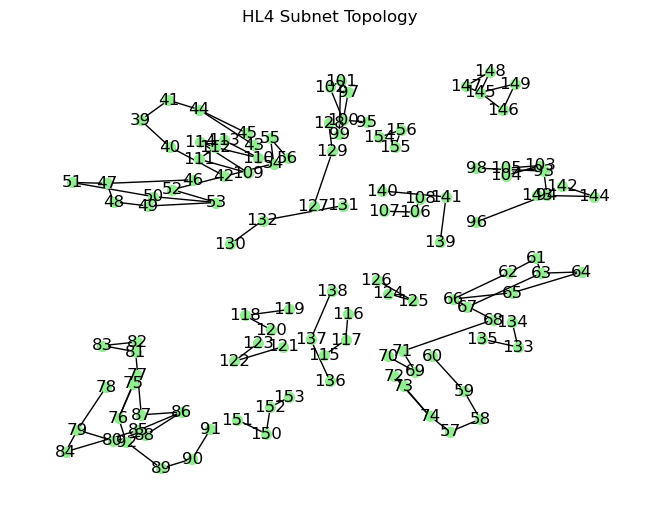

In [13]:
nx.draw(HL4_subgraph, pos = nx.spring_layout(net_graph), with_labels = True, node_color = 'lightgreen', node_size = 50)
plt.title('HL4 Subnet Topology')
plt.show()

#### *Define Cost Matrices*

In [14]:
# Define cost matrix of whole network
netCostMatrix = nx.to_numpy_array(net_graph, weight='weight', nonedge = np.inf)

# Define cost matrix of HL4 subnet
netCostMatrix_HL4 = nx.to_numpy_array(HL4_subgraph, weight='weight', nonedge = np.inf)

#### *Define some parameters*

In [15]:
# define target BER
target_ber = 1e-2

# multi-format loss factors - commented suggest no loss cosideration
phi_MFL =  -1 * [1, 1, 2/3, 17/25, 69/100, 13/21]
# phi_MFL = zeros(1, 6);

epsilon = 0

# define third-order dispersion coefficient
beta_3 = 0.14e-39
Cr = 0.028 / 1e3 / 1e12

# define attenuation coeff (dB/km)
alpha_db = 0.2

# normalized attenuation coeff
alpha_norm = alpha_db / (10 * np.log10(np.exp(1)) * 1e3)

# group velocity dispersion (s^2/m)
beta_2 = -21.7e-27

# define nonlinear parameter (1/(W.m)
gama = 1.21e-3

L_eff_a = 1 / alpha_norm

# noise figure 6 dB
F_C = np.power(10, 0.45)    
F_L = np.power(10, 0.5)         

# Planck's constant (J s)
h_plank = 6.626e-34   

# L_eff is defined as (1 - e ^ (alpha * L_s)) / alpha
L_eff=(1 - np.exp(-1 * alpha_norm * span_length)) / (alpha_norm)


#### *Calculate all HL1, HL2, HL3 nodes that have any connection to HL4s*

In [16]:
# define set to avoid duplicates
HL4_connected_nodes = set() 
for node in HL4_StandAlone:
    HL4_connected_nodes.update(net_graph.neighbors(node))

# Remove the target nodes themselves from the result
HL4_connected_nodes -= set(HL4_StandAlone)

print("Connected higher hierarchical nodes to HL4s:\n", HL4_connected_nodes)

Connected higher hierarchical nodes to HL4s:
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}


#### *K pair link- and node-disjoint shortest paths for HL4 nodes by using DLN_Algorithm*

> ##### Note: *for standalone HL4s we have the primary and secondary, but for colocated HL4 we have only secondary paths. (primary is in it's node)*
> ##### *K_path_attributes's columns --> | 1: source node | 2: destination node | 3: nodes list | 4: distance | 5: links list | 6: number of hops*

##### *Standalone HL4s*

*Define a function to extract all nodes in a certain path*

In [17]:
def nodes_in_path(predecessors, path_index, source, target):
    """Reconstructs the i-th shortest path from the predecessors matrix."""
    path = []
    node = target
    while node != -9999 and node != source:
        path.append(node)
        node = predecessors[path_index, node]
    if node != -9999:
        path.append(source)
        return path[::-1]  # Reverse path to get source-to-target order
    return []  # No path found

*Define a function to extract all links in a certain path*

In [18]:
def links_in_path(all_links, path):
    links_array = []
    for i in range(len(path)):
        if i != len(path) - 1:
            link_idx = np.where(((all_links[:, 0] == path[i]) & (all_links[:, 1] == path[i + 1])) | ((all_links[:, 0] == path[i + 1]) & (all_links[:, 1] == path[i])))[0]
            links_array.append(link_idx[0])

    return links_array

*Calculate K_shortest path between standalone HL4s and possible destinations*

In [19]:
# # create scipy graph to use Yen algorithm
# graph = csr_matrix(netCostMatrix)

# # all links in the whole network array
# all_links = np.array(list(net_graph.edges(data = 'weight')))

# # define how many paths will calc between each source-destination pair
# k_paths = 10

# # define a list to store path attributes
# K_path_attributes = []

# # iterate through each standalone HL4 node
# for src in HL4_StandAlone:

#     for dest in HL4_connected_nodes:
#         local_dict = {}
#         # print(src, dest)
#         # K_path_attributes.append(local_dict)
#         dist_array, predecessors = yen(csgraph = graph, source = src, sink = dest, K = k_paths, directed = False, return_predecessors = True)

#         # Reconstruct and display all paths
#         for candidate_path, dist in enumerate(dist_array):
#             path = nodes_in_path(predecessors, candidate_path, src, dest)
#             links_array = links_in_path(all_links, path)
#             local_dict = {}
#             local_dict['src_node'] = src
#             local_dict['dest_node'] = dest
#             local_dict['nodesList'] = path
#             local_dict['distance'] = dist
#             local_dict['linksList'] = links_array
#             local_dict['numHops'] = len(path) - 1

#             K_path_attributes.append(local_dict)
            

# # Convert K_path_attributes list to dataframe
# df = pd.DataFrame(K_path_attributes)

# # save dataframe to csv file
# df.to_csv(r'.\K_path_attributes.csv', index = False)


*Note: we calculate the K_shortest_path once, after that just load the csv file*

In [20]:
K_path_attributes_df = pd.read_csv(r'.\K_path_attributes.csv')
K_path_attributes_df['linksList'] = K_path_attributes_df['linksList'].apply(ast.literal_eval)
K_path_attributes_df['nodesList'] = K_path_attributes_df['nodesList'].apply(ast.literal_eval)

*Check for the first 5 rows of the dataframe*

In [21]:
K_path_attributes_df.head()

,src_node,dest_node,nodesList,distance,linksList,numHops
0,39,0,"[39, 41, 44, 45, 5, 23, 35, 31, 1, 12, 13, 0]",72.31,"[119, 121, 123, 31, 29, 83, 98, 12, 10, 60, 2]",11
1,39,0,"[39, 41, 44, 43, 5, 23, 35, 31, 1, 12, 13, 0]",73.31,"[119, 121, 122, 30, 29, 83, 98, 12, 10, 60, 2]",11
2,39,0,"[39, 41, 44, 45, 5, 23, 29, 28, 31, 1, 12, 13, 0]",80.31,"[119, 121, 123, 31, 29, 82, 91, 92, 12, 10, 60...",12
3,39,0,"[39, 41, 44, 43, 5, 23, 29, 28, 31, 1, 12, 13, 0]",81.31,"[119, 121, 122, 30, 29, 82, 91, 92, 12, 10, 60...",12
4,39,0,"[39, 40, 42, 4, 24, 124, 8, 30, 19, 28, 31, 1,...",82.12,"[118, 120, 27, 25, 86, 45, 44, 74, 73, 92, 12,...",14


*Filter out all the paths from the source 39 to destination 4*

In [22]:
K_path_attributes_df[(K_path_attributes_df['src_node'] == 39) & (K_path_attributes_df['dest_node'] == 4)]

,src_node,dest_node,nodesList,distance,linksList,numHops
40,39,4,"[39, 40, 42, 4]",30.00,"[118, 120, 27]",3
41,39,4,"[39, 41, 44, 45, 5, 54, 52, 53, 4]",79.20,"[119, 121, 123, 31, 33, 132, 131, 28]",8
42,39,4,"[39, 41, 44, 43, 5, 54, 52, 53, 4]",80.20,"[119, 121, 122, 30, 33, 132, 131, 28]",8
43,39,4,"[39, 41, 44, 45, 5, 46, 47, 51, 50, 53, 4]",85.70,"[119, 121, 123, 31, 32, 124, 126, 129, 130, 28]",10
44,39,4,"[39, 41, 44, 43, 5, 46, 47, 51, 50, 53, 4]",86.70,"[119, 121, 122, 30, 32, 124, 126, 129, 130, 28]",10
45,39,4,"[39, 41, 44, 45, 5, 23, 35, 31, 28, 19, 30, 8,...",88.43,"[119, 121, 123, 31, 29, 83, 98, 92, 73, 74, 44...",14
46,39,4,"[39, 41, 44, 43, 5, 23, 35, 31, 28, 19, 30, 8,...",89.43,"[119, 121, 122, 30, 29, 83, 98, 92, 73, 74, 44...",14
47,39,4,"[39, 41, 44, 45, 5, 23, 35, 31, 28, 19, 30, 8,...",90.43,"[119, 121, 123, 31, 29, 83, 98, 92, 73, 74, 44...",13
48,39,4,"[39, 41, 44, 45, 5, 23, 29, 28, 19, 30, 8, 124...",90.43,"[119, 121, 123, 31, 29, 82, 91, 73, 74, 44, 45...",13
49,39,4,"[39, 41, 44, 43, 5, 23, 29, 28, 19, 30, 8, 124...",91.43,"[119, 121, 122, 30, 29, 82, 91, 73, 74, 44, 45...",13


##### *Colocated HL4s*

In [ ]:
# # define how many paths will calc between each source-destination pair
# k_paths = 5

# # define a list to store path attributes
# K_path_attributes_colocated = []

# # iterate through each colocated HL4 node
# for src in HL4_colocated:

#     for dest in HL4_connected_nodes:
#         local_dict = {}

#         if src != dest:
            
#             # K_path_attributes.append(local_dict)
#             dist_array, predecessors = yen(csgraph = graph, source = src, sink = dest, K = k_paths, directed = False, return_predecessors = True)

#             # Reconstruct and display all paths
#             for candidate_path, dist in enumerate(dist_array):
#                 path = nodes_in_path(predecessors, candidate_path, src, dest)
#                 links_array = links_in_path(all_links, path)

#                 local_dict = {}
#                 local_dict['src_node'] = src
#                 local_dict['dest_node'] = dest
#                 local_dict['nodesList'] = path
#                 local_dict['distance'] = dist
#                 local_dict['linksList'] = links_array
#                 local_dict['numHops'] = len(path) - 1

#                 K_path_attributes_colocated.append(local_dict)

# # Convert K_path_attributes list to dataframe
# df = pd.DataFrame(K_path_attributes_colocated)

# # save dataframe to csv file
# df.to_csv(r'.\K_path_attributes_colocated.csv', index = False)


*Note: we calculate the K_shortest_path once, after that just load the csv file*

In [24]:
K_path_attributes_colocated_df = pd.read_csv(r'.\K_path_attributes_colocated.csv')
K_path_attributes_colocated_df['linksList'] = K_path_attributes_colocated_df['linksList'].apply(ast.literal_eval)
K_path_attributes_colocated_df['nodesList'] = K_path_attributes_colocated_df['nodesList'].apply(ast.literal_eval)

*Check for the first 5 rows of the dataframe*

In [25]:
K_path_attributes_colocated_df.head()

,src_node,dest_node,nodesList,distance,linksList,numHops
0,0,1,"[0, 13, 12, 1]",15.00,"[2, 60, 10]",3
1,0,1,"[0, 13, 143, 144, 142, 12, 1]",46.00,"[2, 63, 208, 207, 62, 10]",6
2,0,1,"[0, 16, 17, 2, 11, 1]",48.00,"[5, 67, 16, 15, 9]",5
3,0,1,"[0, 2, 11, 1]",48.33,"[0, 15, 9]",3
4,0,1,"[0, 13, 12, 33, 37, 11, 1]",56.00,"[2, 60, 61, 102, 57, 9]",6


*Filter out all the paths from the source 39 to destination 4*

In [26]:
K_path_attributes_colocated_df[(K_path_attributes_colocated_df['src_node'] == 36) & (K_path_attributes_colocated_df['dest_node'] == 30)]

,src_node,dest_node,nodesList,distance,linksList,numHops
6990,36,30,"[36, 38, 152, 30]",21.0,"[106, 117, 96]",3
6991,36,30,"[36, 38, 30]",23.0,"[106, 95]",2
6992,36,30,"[36, 21, 1, 31, 28, 19, 30]",26.0,"[78, 11, 12, 92, 73, 74]",6
6993,36,30,"[36, 38, 151, 150, 152, 30]",38.0,"[106, 116, 215, 216, 96]",5
6994,36,30,"[36, 38, 152, 153, 30]",41.0,"[106, 117, 217, 97]",4


*Plot the subnet topology for double check*

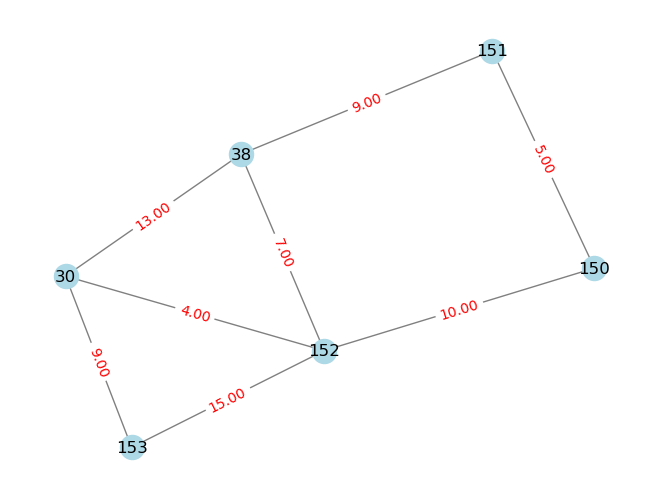

In [27]:
nodes = np.array([38, 151, 150, 152, 153, 30])
sub_net_local = net_graph.subgraph(nodes)

pos = nx.spring_layout(sub_net_local)  # Use full graph positions for consistency
nx.draw(sub_net_local, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# plot the weights of edges on the graph
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in sub_net_local.edges(data=True)}
nx.draw_networkx_edge_labels(sub_net_local, pos, edge_labels=edge_labels, font_color='red')

plt.show()

#### *Calculate Primary and Secondary paths of each source-destination pair*

##### *Standalone HL4s*

*Sort the K_path_attribute dataframe based on numHops and distance in order*

In [28]:
K_paths_sorted = K_path_attributes_df.groupby(['src_node'], group_keys = False).apply(lambda x: x.sort_values(['numHops', 'distance']))

*Check for the first 5 sorted path*

In [29]:
K_paths_sorted.head()

,src_node,dest_node,nodesList,distance,linksList,numHops
40,39,4,"[39, 40, 42, 4]",30.00,"[118, 120, 27]",3
50,39,5,"[39, 41, 44, 45, 5]",37.00,"[119, 121, 123, 31]",4
51,39,5,"[39, 41, 44, 43, 5]",38.00,"[119, 121, 122, 30]",4
240,39,24,"[39, 40, 42, 4, 24]",39.12,"[118, 120, 27, 25]",4
260,39,26,"[39, 40, 42, 4, 26]",45.84,"[118, 120, 27, 26]",4


*Calculate all secondary paths for each path in the dataframe*

> *Note: The secondary paths must be fully disjoint, means don't have shared nodes or links with the primary path*

In [121]:
# standalone_path_storage = []
# primary_path_storage = []
# secondary_path_Storage = []
# numHops_secondary_storage = []
# distance_secondary_storage = []

# # iterate through each standalone HL4 node
# for node in HL4_StandAlone:
#     node_df = K_paths_sorted[K_paths_sorted['src_node'] == node]

#     # iterate through each paths of the selected source node
#     for index, row in node_df.iterrows():

#         # extract the information of primary path
#         dest_primary = row['dest_node']
#         nodes_primary = row['nodesList']
#         links_primary = row['linksList']
        
#         # calculate all candidate secondary paths, they should have different destinations of primary path
#         secondary_df = node_df[node_df['dest_node'] != dest_primary]

#         # iterate through each candidate secondary path
#         for index_secondary, row_secondary in secondary_df.iterrows():

#             # extract the information of candidate secondary path
#             nodes_secondary = row_secondary['nodesList']
#             links_secondary = row_secondary['linksList']

#             # check for the common nodes and links of primary and candidate secondary paths
#             common_nodes = np.intersect1d(nodes_primary, nodes_secondary)
#             common_links = np.intersect1d(links_primary, links_secondary)


#             # there is one common node always that is src_node
#             if common_nodes.size == 1 and common_links.size == 0:

#                 # save the primary path and approved secondary path indices to separate lists
#                 primary_path_storage.append(index)
#                 secondary_path_Storage.append(index_secondary)

#                 # save numHops and distance of approved secondary path to separate lists
#                 numHops_secondary_storage.append(row_secondary['numHops'])
#                 distance_secondary_storage.append(row_secondary['distance'])

# # save all the standalone paths in one array
# standalone_path_storage.append(primary_path_storage) # first row is primary path indices
# standalone_path_storage.append(secondary_path_Storage) # second row is approved secondary path indices
# standalone_path_storage.append(numHops_secondary_storage) # third row is numHops of approved secondary paths
# standalone_path_storage.append(distance_secondary_storage) # fourth row is distance of approved secondary paths

# standalone_path_storage = np.array(standalone_path_storage)

# # convert numpy array of primary-secondary pairs to a dataframe
# standalone_path_df = pd.DataFrame(standalone_path_storage.T, columns = ['primary_path', 'secondary_path', 'numHops_secondary', 'distance_secondary'])

# # save the standalone dataframe
# standalone_path_df.to_csv(r'.\standalone_paths.csv', index = False)

*Load the standalone path pairs dataframe*

In [31]:
standalone_path_df = pd.read_csv(r'.\standalone_paths.csv')

In [34]:
standalone_path_df.head()

,primary_path,secondary_path,numHops_secondary,distance_secondary
0,40.0,50.0,4.0,37.00
1,40.0,51.0,4.0,38.00
2,40.0,230.0,5.0,43.31
3,40.0,231.0,5.0,44.31
4,40.0,32.0,5.0,74.43


*Count the number of secondary paths for each primary path*

In [35]:
print(standalone_path_df.groupby('primary_path')['secondary_path'].count())

primary_path
0.0        88
1.0        88
2.0        79
3.0        79
4.0        25
           ..
46015.0    19
46016.0    36
46017.0    19
46018.0    36
46019.0    82
Name: secondary_path, Length: 30580, dtype: int64


*Add src_node column to filtered_standalone_df*

In [88]:
standalone_path_df

,primary_path,secondary_path,numHops_secondary,distance_secondary
0,40.0,50.0,4.0,37.00
1,40.0,51.0,4.0,38.00
2,40.0,230.0,5.0,43.31
3,40.0,231.0,5.0,44.31
4,40.0,32.0,5.0,74.43
...,...,...,...,...
1303069,45957.0,45724.0,13.0,122.00
1303070,45957.0,45727.0,14.0,129.00
1303071,45957.0,45975.0,15.0,135.00
1303072,45957.0,45974.0,16.0,133.00


In [89]:
standalone_path_df = standalone_path_df.merge(K_path_attributes_df['src_node'].reset_index(), 
                                                      left_on='primary_path', right_on='index', how='left').drop(columns=['index'])

In [90]:
standalone_path_df.head()

,primary_path,secondary_path,numHops_secondary,distance_secondary,src_node
0,40.0,50.0,4.0,37.00,39
1,40.0,51.0,4.0,38.00,39
2,40.0,230.0,5.0,43.31,39
3,40.0,231.0,5.0,44.31,39
4,40.0,32.0,5.0,74.43,39


*Calculate all available standalone HL4*
> *not available nodes doesn't have primary-secondary path at all (with k_path = 10).*

In [111]:
available_HL4_standalone_nodes = standalone_path_df['src_node'].unique()

*Calculate not available standalone HL4s*

In [112]:
nonavailable_standalone_HL4 = np.setdiff1d(HL4_StandAlone, available_HL4_standalone_nodes)

*Calculate the number of primary-secondary pairs available for each standalone HL4 nodes*

In [113]:
num_K_pair_final = standalone_path_df.groupby('src_node')['primary_path'].count().to_numpy()

*Find the index of nonavailable standalone HL4s in standalone HL4 nodes*

In [114]:
indices = [np.where(HL4_StandAlone == val)[0][0] if val in HL4_StandAlone else -1 for val in nonavailable_standalone_HL4]

*Insert zero to the index of nonavailable standalone HL4 nodes*

In [119]:
num_K_pair_final = np.insert(num_K_pair_final, indices, 0)

##### *Colocated HL4s*

> *Note: for the colocated HL4s there are only secondary paths*

*Sort the K_path_attribute_colocated dataframe based on numHops and distance in order*

In [134]:
K_paths_sorted_colocated = K_path_attributes_colocated_df.groupby(['src_node', 'dest_node'], group_keys = False).apply(lambda x: x.sort_values(['numHops', 'distance']))

In [138]:
K_paths_sorted_colocated

,src_node,dest_node,nodesList,distance,linksList,numHops
0,0,1,"[0, 13, 12, 1]",15.00,"[2, 60, 10]",3
3,0,1,"[0, 2, 11, 1]",48.33,"[0, 15, 9]",3
2,0,1,"[0, 16, 17, 2, 11, 1]",48.00,"[5, 67, 16, 15, 9]",5
1,0,1,"[0, 13, 143, 144, 142, 12, 1]",46.00,"[2, 63, 208, 207, 62, 10]",6
4,0,1,"[0, 13, 12, 33, 37, 11, 1]",56.00,"[2, 60, 61, 102, 57, 9]",6
...,...,...,...,...,...,...
7407,38,37,"[38, 36, 21, 1, 11, 37]",44.00,"[106, 78, 11, 9, 57]",5
7406,38,37,"[38, 30, 19, 28, 31, 1, 11, 37]",41.00,"[95, 74, 73, 92, 12, 9, 57]",7
7405,38,37,"[38, 152, 30, 19, 28, 31, 1, 11, 37]",39.00,"[117, 96, 74, 73, 92, 12, 9, 57]",8
7409,38,37,"[38, 30, 19, 28, 31, 1, 12, 33, 37]",56.00,"[95, 74, 73, 92, 12, 10, 61, 102]",8


> *There are 5 paths between each colocated source-node pair*